# Dirac Notation Implementation - DEMO

2024-03-01

## Set up the environment

In [14]:
from wolframclient.evaluation import WolframLanguageSession
from wolframclient.language import wl, wlexpr
session = WolframLanguageSession()

In [15]:
from diracdec import *
from diracdec import dirac_bigop_delta_trs, label_trs
trs = dirac_bigop_delta_trs + label_trs

In [16]:
sub = parse('''
{
        ket0 : KET('0');
        bra0 : BRA('0');
        ket1 : KET('1');
        bra1 : BRA('1');
        ketP :  "Sqrt[1/2]" SCR (ket0 ADD ket1) ;
        braP :  "Sqrt[1/2]" SCR (bra0 ADD bra1) ;
        ketM :  "Sqrt[1/2]" SCR (ket0 ADD ("-1" MLTK ket1)) ;
        braM :  "Sqrt[1/2]" SCR (bra0 ADD ("-1" MLTB bra1)) ;

        beta00 :  "Sqrt[1/2]" SCR ((ket0 TSR ket0) ADD (ket1 TSR ket1));

        I2 : (ket0 OUTER bra0) ADD (ket1 OUTER bra1);

        Z : (ket0 OUTER bra0) ADD ("-1" SCR (ket1 OUTER bra1));

        X : (ket0 OUTER bra1) ADD (ket1 OUTER bra0);

        Y : ("-I" SCR (ket0 OUTER bra1)) ADD ("I" SCR (ket1 OUTER bra0));


        H :  "Sqrt[1/2]" SCR ((ket0 OUTER bra0) ADD (ket0 OUTER bra1) ADD (ket1 OUTER bra0) ADD ("-1" SCR (ket1 OUTER bra1)));

        CX :  ((ket0 TSR ket0) OUTER (bra0 TSR bra0))
                    ADD ((ket0 TSR ket1) OUTER (bra0 TSR bra1)) 
                    ADD ((ket1 TSR ket1) OUTER (bra1 TSR bra0))
                    ADD ((ket1 TSR ket0) OUTER (bra1 TSR bra1));

        CZ :  ((ket0 TSR ket0) OUTER (bra0 TSR bra0))
                    ADD ((ket0 TSR ket1) OUTER (bra0 TSR bra1)) 
                    ADD ((ket1 TSR ket0) OUTER (bra1 TSR bra0))
                    ADD ("-1" SCR ((ket1 TSR ket1) OUTER (bra1 TSR bra1)));
        }
          ''').get_idempotent()


In [17]:
print(sub)

┌───────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│                                                                                                           │
│ bra1 ↦ <1|                                                                                                │
│                                                                                                           │
│ CZ ↦ (((|0>⊗|0>)⊗(<0|⊗<0|)) + ((|0>⊗|1>)⊗(<0|⊗<1|)) + ((|1>⊗|0>)⊗(<1|⊗<0|)) + (-1.((|1>⊗|1>)⊗(<1|⊗<1|)))) │
│                                                                                                           │
│        ⎛   1                    ⎞                                                                         │
│ braM ↦ ⎜-------.(<0| + (-1·<1|))⎟                                                                         │
│        ⎝Sqrt[2]                 ⎠                                                                         │
│         

## Examples

### Operation on Maximally Entangled State

For all $A$,
$$
A_{S} \ket{\Phi}_{S, T} = A^\top_{T} \ket{\Phi}_{S, T}
$$
where
$$
\ket{\Phi} = \sum_{i}\ket{i}\ket{i}
$$

In [37]:
a = parse(''' 
                (
                    
                   (SUM(i, KET(i) OUTER BRA(i))[S]) MLTO (A[S])
                ) 
                MLTK 
                (
                    SUM(i, KET(PAIR(i, i))[PAIRR(S, T)])
                ) 
            ''')

b = parse(''' 
                (
                    (1O TSR SUM(i, KET(i) OUTER BRA(i))) MLTO (1O TSR TP(A))
                ) 
                MLTK 
                (
                    SUM(i, KET(PAIR(i, i)))
                ) 
            ''')

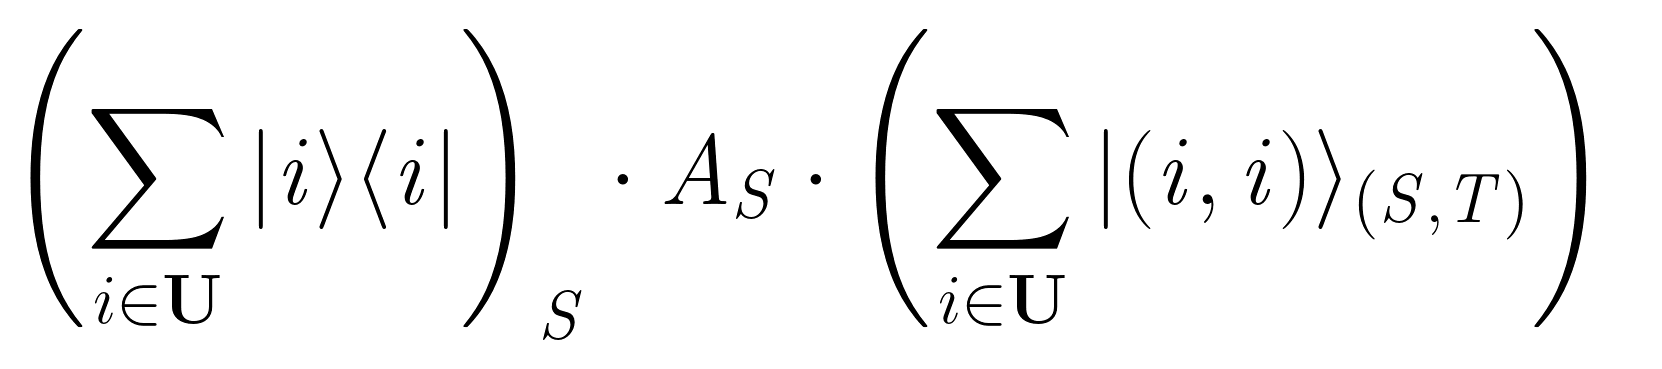

In [38]:
a.render_tex()

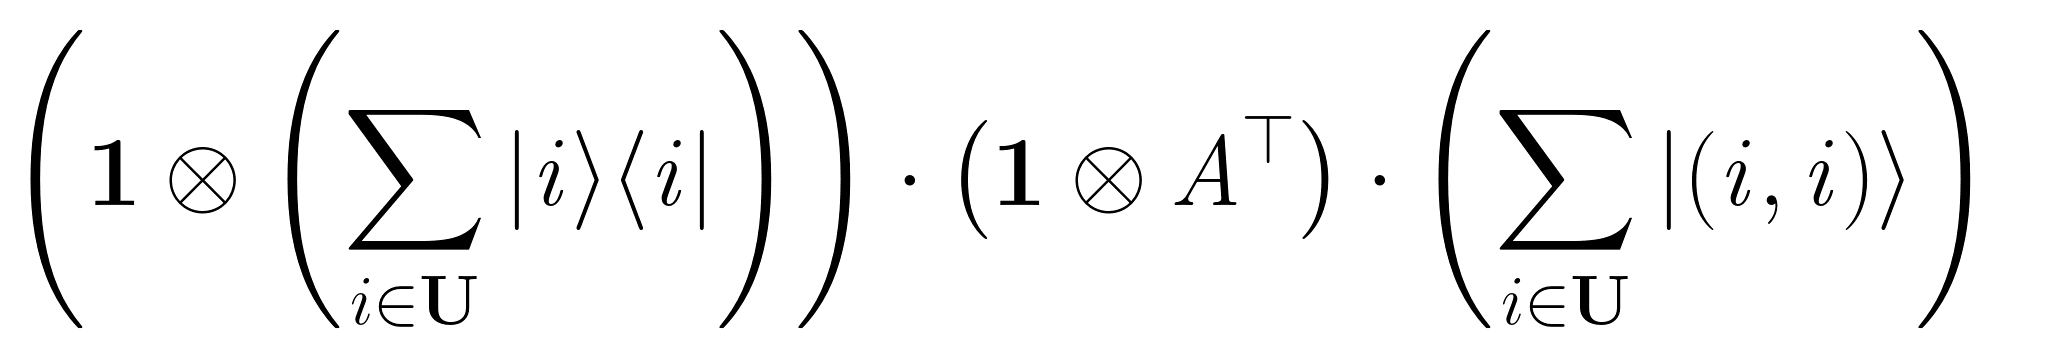

In [20]:
b.render_tex()

In [35]:
norm_a = trs.normalize(a)
norm_b = trs.normalize(b)

assert trs.normalize(juxt(norm_a)) == trs.normalize(juxt(norm_b))

AssertionError: 

In [22]:
trs.normalize(a, verbose=True)

Renaming rule variables...
== STEP 1 ==
Current Term:
⎛⎛⎛ __              ⎞      ⎞  __           ⎞
⎜⎜⎜ \               ⎟      ⎟  \            ⎟
⎜⎜⎜ /    (|i>⊗<i|)⊗𝟏⎟·(A⊗𝟏)⎟· /    |(i, i)>⎟
⎜⎜⎜ ‾‾              ⎟      ⎟  ‾‾           ⎟
⎝⎝⎝i ∈ 𝐔            ⎠      ⎠ i ∈ 𝐔         ⎠

== STEP 1 ==
Current Term:
((|x0>⊗<x0|)⊗𝟏)

It is the normal form.
┌apply OPT-MLT-12──────────────────────────────────────────┐
│⎛⎛ __              ⎞      ⎞    ⎛⎛ __              ⎞      ⎞│
│⎜⎜ \               ⎟      ⎟    ⎜⎜ \               ⎟      ⎟│
│⎜⎜ /    (|i>⊗<i|)⊗𝟏⎟·(A⊗𝟏)⎟ -> ⎜⎜ /    (|i>⊗<i|)·A⎟⊗(𝟏·𝟏)⎟│
│⎜⎜ ‾‾              ⎟      ⎟    ⎜⎜ ‾‾              ⎟      ⎟│
│⎝⎝i ∈ 𝐔            ⎠      ⎠    ⎝⎝i ∈ 𝐔            ⎠      ⎠│
└──────────────────────────────────────────────────────────┘

== STEP 2 ==
Current Term:
⎛⎛⎛ __              ⎞      ⎞  __           ⎞
⎜⎜⎜ \               ⎟      ⎟  \            ⎟
⎜⎜⎜ /    (|i>⊗<i|)·A⎟⊗(𝟏·𝟏)⎟· /    |(i, i)>⎟
⎜⎜⎜ ‾‾              ⎟      ⎟  ‾‾           ⎟
⎝⎝⎝i ∈ 𝐔          

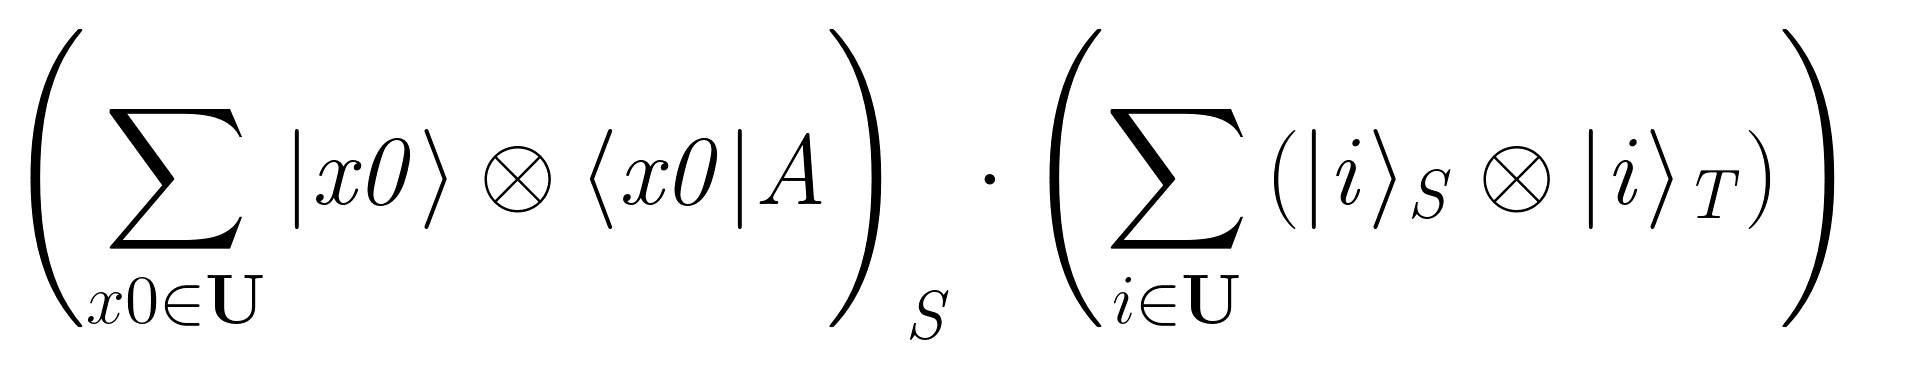

In [39]:
trs.normalize(a).render_tex()

### abstraction and application: Choi representation

In [24]:
choi_sub = Subst({
"choi" : parse(r''' 
FUN A . SUM(i, 
            SUM(j, 
                (BRA(i) DOT (A MLTK KET(j)))
                SCR KET(PAIR(i,j))
            )    
        ) '''),
"unchoi" : parse(r'''
FUN A . SUM(i,
            SUM(j,
                (BRA(PAIR(i, j)) DOT A)
                SCR (KET(i) OUTER BRA(j))
                )
        )''')
}).get_idempotent()

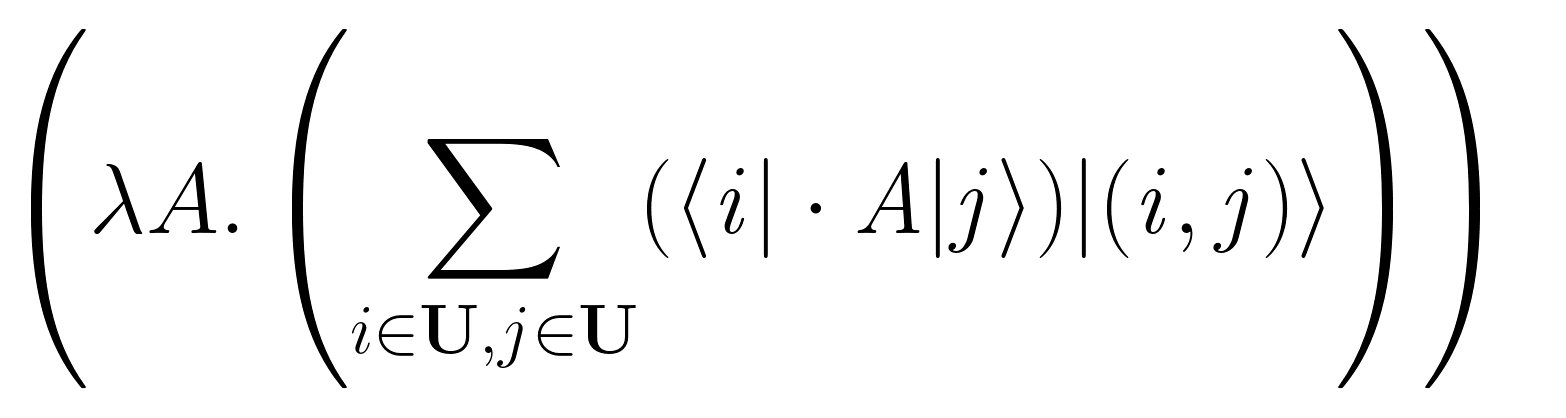

In [25]:
a = choi_sub(parse(r'''choi'''))
a.render_tex()

In [26]:
print(a)

⎛         __                              ⎞
⎜         \                               ⎟
⎜λ A.     /       ((<i|·(A·|j>)).|(i, j)>)⎟
⎜         ‾‾                              ⎟
⎝    i ∈ 𝐔, j ∈ 𝐔                         ⎠


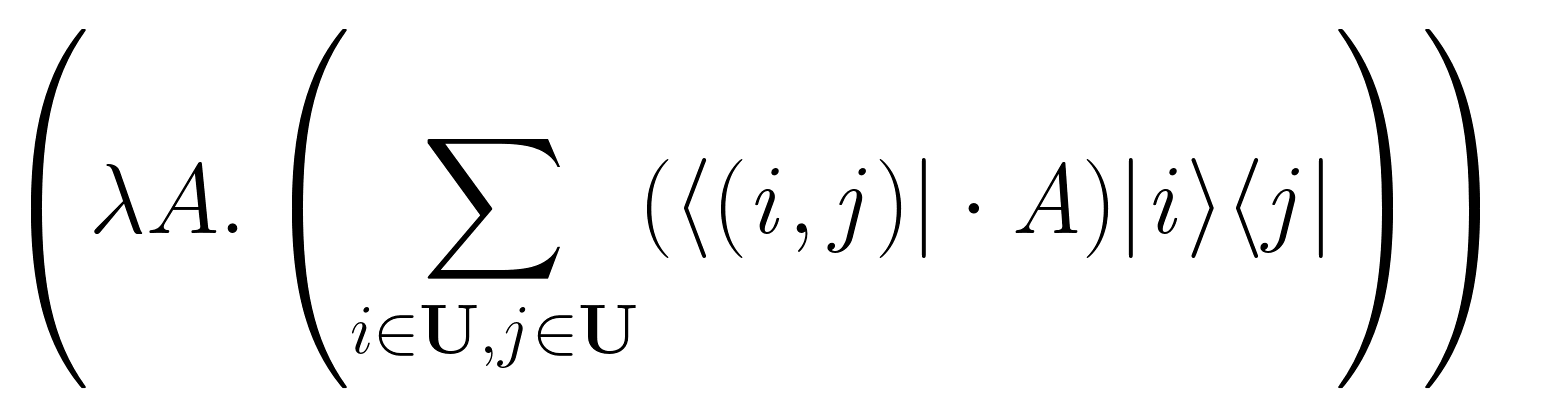

In [27]:
b = choi_sub(parse(r'''unchoi'''))
b.render_tex()

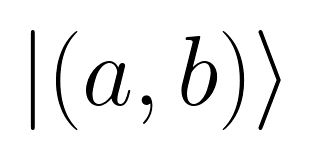

In [28]:
a_ = choi_sub(parse(r''' choi @ (KET('a') OUTER BRA('b')) '''))
trs.normalize(a_).render_tex()

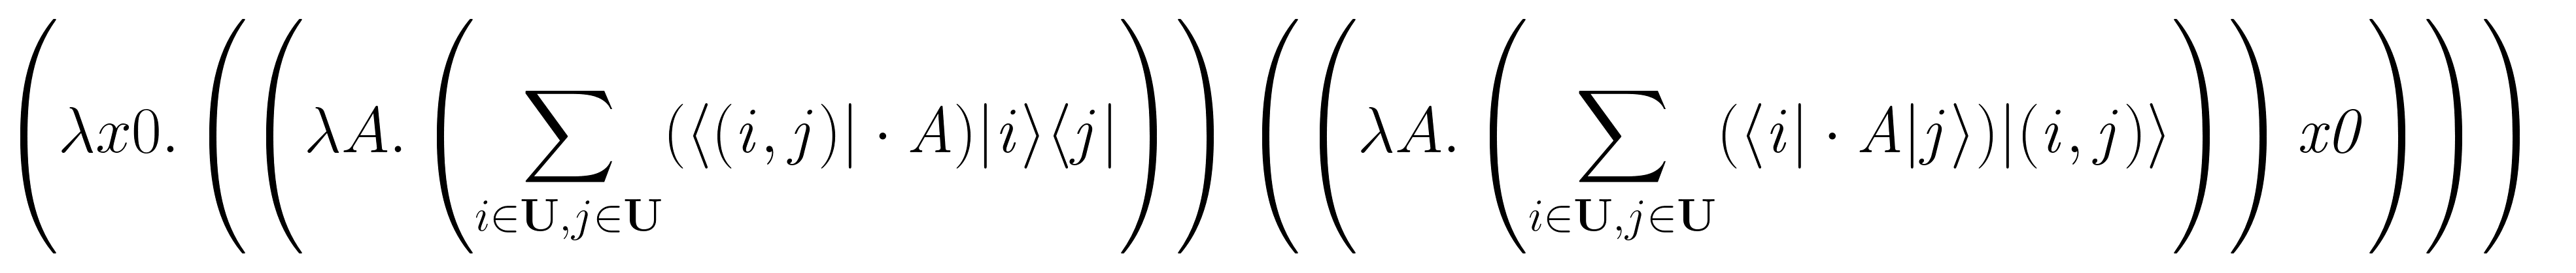

In [29]:
c = choi_sub(parse(r'''FUN A . unchoi @ (choi @ A) '''))
c.render_tex()

In [30]:
trs.normalize(c, verbose=True)

Renaming rule variables...
== STEP 1 ==
Current Term:
⎛     ⎛         __                              ⎞ ⎛         __                              ⎞   ⎞
⎜     ⎜         \                               ⎟ ⎜         \                               ⎟   ⎟
⎜λ x0.⎜λ A.     /       ((<(i, j)|·A).(|i>⊗<j|))⎟ ⎜λ A.     /       ((<i|·(A·|j>)).|(i, j)>)⎟ x0⎟
⎜     ⎜         ‾‾                              ⎟ ⎜         ‾‾                              ⎟   ⎟
⎝     ⎝    i ∈ 𝐔, j ∈ 𝐔                         ⎠ ⎝    i ∈ 𝐔, j ∈ 𝐔                         ⎠   ⎠

┌apply BETA-REDUCTION────────────────────────────────────────────────────────────────────┐
│⎛         __                              ⎞            __                               │
│⎜         \                               ⎟            \                                │
│⎜λ A.     /       ((<i|·(A·|j>)).|(i, j)>)⎟ x0 ->      /       ((<i|·(x0·|j>)).|(i, j)>)│
│⎜         ‾‾                              ⎟            ‾‾                               │


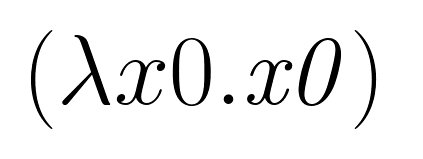

In [31]:
entry_trs.normalize(trs.normalize(c)).render_tex()